In [35]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

In [27]:
def mutual_information(q, p1, p2):
    p_y1 = p1 * q + p2 * (1 - q)
    p_y0 = 1 - p_y1
    p_x1_y1 = q * p1
    p_x1_y0 = q * (1 - p1)
    p_x0_y1 = (1 - q) * p2 
    p_x0_y0 = (1 - q) * (1 - p2)
    
    mutual_information = p_x1_y1 * np.log(p_x1_y1 / (q * p_y1)) + \
                        p_x1_y0 * np.log(p_x1_y0 / (q * p_y0)) + \
                        p_x0_y1 * np.log(p_x0_y1 / ((1 - q) * p_y1)) + \
                        p_x0_y0 * np.log(p_x0_y0 / ((1 - q) * p_y0))
                        
    return mutual_information

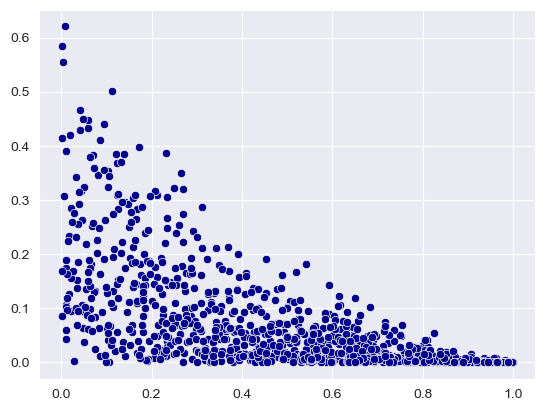

In [41]:
NUM_SAMPLES = 1000

sns.set_style('darkgrid')

res = []
for i in range(NUM_SAMPLES):
    q, p1, p2 = tuple(np.random.uniform(0, 1, 3))
    di = np.minimum(p1 / p2, p2 / p1)
    mi = mutual_information(q, p1, p2)
    res.append([q, di, mi])
    sns.scatterplot(x=[di], y=[mi], color='darkblue')

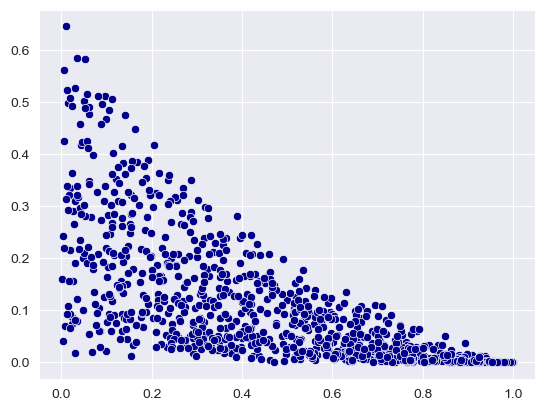

In [46]:
df_res =[]
for i in range(NUM_SAMPLES):
    q = 0.5
    p1, p2 = tuple(np.random.uniform(0, 1, 2))
    di = np.minimum(p1 / p2, p2 / p1)
    mi = mutual_information(q, p1, p2)
    df_res.append([q, p1, p2, di, mi])
    sns.scatterplot(x=[di], y=[mi], color='darkblue')
    
df_res = pd.DataFrame(df_res, columns=['q', 'p1', 'p2', 'di', 'mi'])

In [47]:
df_res.head()

,q,p1,p2,di,mi
0,0.5,0.703674,0.978247,0.719321,0.081822
1,0.5,0.469642,0.730954,0.642506,0.036085
2,0.5,0.727270,0.047858,0.065805,0.278589
3,0.5,0.506162,0.873997,0.579135,0.083143
4,0.5,0.574387,0.532253,0.926645,0.000898


In [49]:
df_res['sum'] = df_res['di'] + df_res['mi']

df_res.sort_values(by='sum', ascending=True).head()

,q,p1,p2,di,mi,sum
747,0.5,0.000287,0.115691,0.002477,0.040960,0.043437
531,0.5,0.062050,0.001830,0.029493,0.018455,0.047948
649,0.5,0.200920,0.001725,0.008585,0.070792,0.079378
763,0.5,0.003756,0.200050,0.018775,0.066646,0.085421
143,0.5,0.077525,0.005209,0.067186,0.019633,0.086819
